In [ ]:
#Install and load library
# update.packages(ask = FALSE)
# install.packages("NLP", dependencies=TRUE)
# install.packages("slam", dependencies=TRUE)
# install.packages("tm", dependencies=TRUE) # for text mining
# install.package("SnowballC", dependencies=TRUE) # for text stemming
# install.packages("wordcloud", dependencies=TRUE)# word-cloud generator
# install.packages("RColorBrewer", dependencies=TRUE) # color palettes
# install.packages('lda', dependencies=TRUE)
# install.packages('modeltools', dependencies=TRUE)
# install.packages('stats4', dependencies=TRUE)
# # install.packages('methods', dependencies=TRUE)
# install.packages('toppicmodels', dependencies=TRUE)
# install.packages('ggplot2', dependencies = TRUE)
# install.packages("NbClust", dependencies = TRUE)
# install.packages("factoextra", dependencies = TRUE)

# install.packages("lda", dependencies = TRUE)
# install.packages("MASS", dependencies = TRUE)
# install.packages("topicmodels", dependencies = TRUE)
# install.packages("lsa", dependencies = TRUE)

In [ ]:
setwd("/home/harish/PycharmProjects/Topic-Modeling/")

In [ ]:
library(NLP)
library(tm)
library(SnowballC)
library(wordcloud)
library(RColorBrewer)
library(ggplot2)
library(factoextra)
# library(cluster)
library(NbClust)
library(lsa)
# library(fpc)

#LDA

library(lda)
library(MASS)
library(topicmodels)

In [ ]:
## BUILDING CORPUS

folder <-"/home/harish/PycharmProjects/Topic-Modeling/Data Extraction/dataset/FullDataset/"
summary(folder)
corpus_name <- Corpus(DirSource(folder, recursive=TRUE),readerControl = list(reader=readPlain));

In [3]:
num_docs <- length(corpus_name)

In [4]:
#---------------Data preprocessing:
print("dimension before:");
print(DocumentTermMatrix(corpus_name));

corpus_name<-tm_map(corpus_name,PlainTextDocument);
corpus_name<-tm_map(corpus_name, content_transformer(tolower));
corpus_name<-tm_map(corpus_name,removeWords,stopwords("english"));
corpus_name<-tm_map(corpus_name,removePunctuation);
corpus_name<-tm_map(corpus_name,removeNumbers);
corpus_name<-tm_map(corpus_name,stripWhitespace);

words_to_remove_in_article<-c("system","reserve","tthe","rnthe","participants", "continue", "open","committee", "federal", "also", "meeting", "FOMC", "\r","\t","Present", "\n", 'year') #irrevalant words
corpus_name<-tm_map(corpus_name, removeWords,words_to_remove_in_article); #removing irrevalant words in the article

corpus_name<-tm_map(corpus_name, stemDocument, language="english");

print("dimension after:");
print(DocumentTermMatrix(corpus_name));

[1] "dimension before:"
<<DocumentTermMatrix (documents: 196, terms: 10800)>>
Non-/sparse entries: 218630/1898170
Sparsity           : 90%
Maximal term length: 26
Weighting          : term frequency (tf)
[1] "dimension after:"
<<DocumentTermMatrix (documents: 196, terms: 12474)>>
Non-/sparse entries: 171522/2273382
Sparsity           : 93%
Maximal term length: 142
Weighting          : term frequency (tf)


In [5]:
#todo: change the bounds, weighttfidf, 

In [10]:
#----------------------Text Analysis------

##build tdm/dtm matrix
tdm <- TermDocumentMatrix(corpus_name,control=list(wordLengths=c(4,Inf),bounds = list(global = c(2,Inf))))
tdm_matrix <- as.matrix(tdm)
##build a document/term matrix... words must have length 4
dtm <- DocumentTermMatrix(corpus_name,control=list(wordLengths=c(4,Inf),bounds = list(global = c(2,Inf))))
dtm_matrix <- as.matrix(dtm)
print(dim(dtm_matrix))
dtm

[1]  196 5245


<<DocumentTermMatrix (documents: 196, terms: 5245)>>
Non-/sparse entries: 158159/869861
Sparsity           : 85%
Maximal term length: 56
Weighting          : term frequency (tf)

In [11]:
dtms <- removeSparseTerms(dtm, 0.93)
dtms

<<DocumentTermMatrix (documents: 196, terms: 1858)>>
Non-/sparse entries: 143490/220678
Sparsity           : 61%
Maximal term length: 20
Weighting          : term frequency (tf)

In [51]:
m <- as.matrix(tdm)
v <- sort(rowSums(m), decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
# print(head(d, 30))
print(findFreqTerms(dtm,lowfreq = 2000))

 [1] "activ"    "balanc"   "bank"     "busi"     "chang"    "committe"
 [7] "condit"   "consum"   "continu"  "declin"   "econom"   "economi" 
[13] "expect"   "financi"  "forecast" "fund"     "growth"   "howev"   
[19] "increas"  "indic"    "inflat"   "labor"    "level"    "like"    
[25] "market"   "measur"   "moder"    "monetari" "month"    "note"    
[31] "number"   "outlook"  "pace"     "percent"  "period"   "polici"  
[37] "price"    "product"  "project"  "quarter"  "rang"     "rate"    
[43] "real"     "remain"   "rise"     "risk"     "spend"    "time"    
[49] "unemploy"


### Freq Visualization:

In [ ]:
  #bar plot:
#   saveFileAs<- paste("wordFreq_barplot", i, sep="_")
#   setwd('/home/harish/PycharmProjects/Topic-Modeling/pictures')
#   png(filename = saveFileAs)
  barplot(d[1:20,]$freq, las = 2, names.arg = d[1:20,]$word,
          col ="lightblue", main ="Most frequent words",
          ylab = "Word frequencies")
#   dev.off()



In [ ]:
#   saveFileAs<- paste("wordcloud", i, sep="_")
#   png(filename = saveFileAs)
#   wordcloud(names(v), v, max.words=100, rot.per=0.15, random.order=F,colors=brewer.pal(8, "Dark2"))
#   dev.off()

In [ ]:
head(d,30)

### Word Importance : TF-IDF

In [15]:
dtm_tfidf <- weightTfIdf(dtms) 
dtm_tfidf

<<DocumentTermMatrix (documents: 196, terms: 1858)>>
Non-/sparse entries: 128594/235574
Sparsity           : 65%
Maximal term length: 20
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

### Clustering:

In [32]:
matDTM<-as.matrix(dtms)
tfidf<-weightTfIdf(dtms)
tfidf# how does the sparsity increases compared to dtms?
sparse<-removeSparseTerms(tfidf,0.995)
s<-as.matrix(sparse); dim(s)

<<DocumentTermMatrix (documents: 196, terms: 1858)>>
Non-/sparse entries: 128594/235574
Sparsity           : 65%
Maximal term length: 20
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

[1]  196 1782

##### Optimal clustmer number

In [61]:
#clustering
set.seed(123)
res<-NbClust(data=s, min.nc = 2, max.nc = 20, distance="euclidean", method="kmeans", index="silhouette")
f<-fviz_nbclust(s,kmeans,method="silhouette")
res$Best.nc
#saving
# png('optimalCluster2.png')
# f
# dev.off()
# res


Number_clusters     Value_Index 
         3.0000          0.1078

## NOTE: There are two optimum which are closer, check out  cluster number = 6

In [97]:
# f+geom_vline(xintercept = 6, linetype = 2)+labs(subtitle = "Silhouette method")

In [98]:
# fviz_nbclust(s, kmeans, method = "wss") +
# geom_vline(xintercept = 6, linetype = 2)+
# labs(subtitle = "Elbow method")


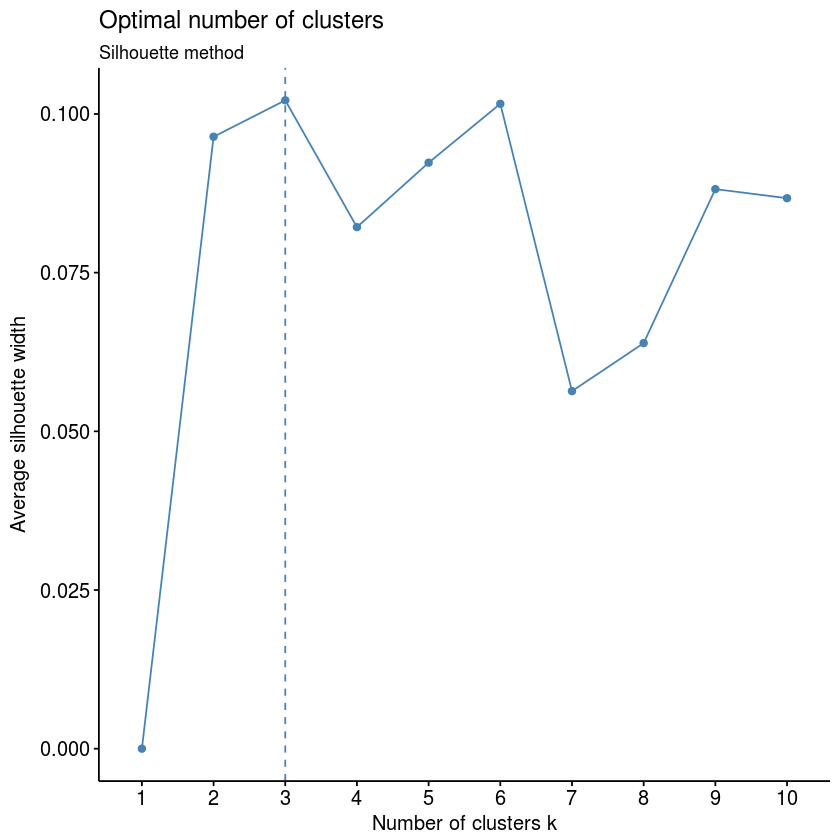

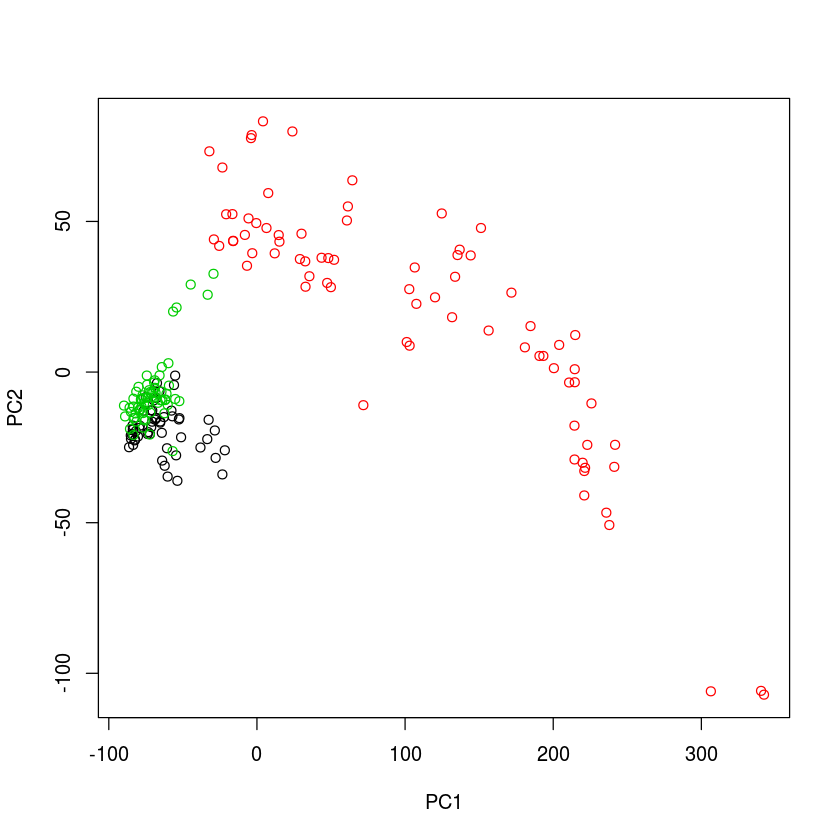

In [99]:
# #Silhouette Method
# fviz_nbclust(s, kmeans, method = "silhouette")+labs(subtitle = "Silhouette method")
# # plot(prcomp(dtms)$x,col=cl_3$cluster)

# Kmeans

prcomp: 

Performs a principal components analysis on the given data matrix and returns the results as an object of class prcomp.

The calculation is done by a singular value decomposition of the (centered and possibly scaled) data matrix, not by using eigen on the covariance matrix. This is generally the preferred method for numerical accuracy.


 1  2  3 
54 76 66 

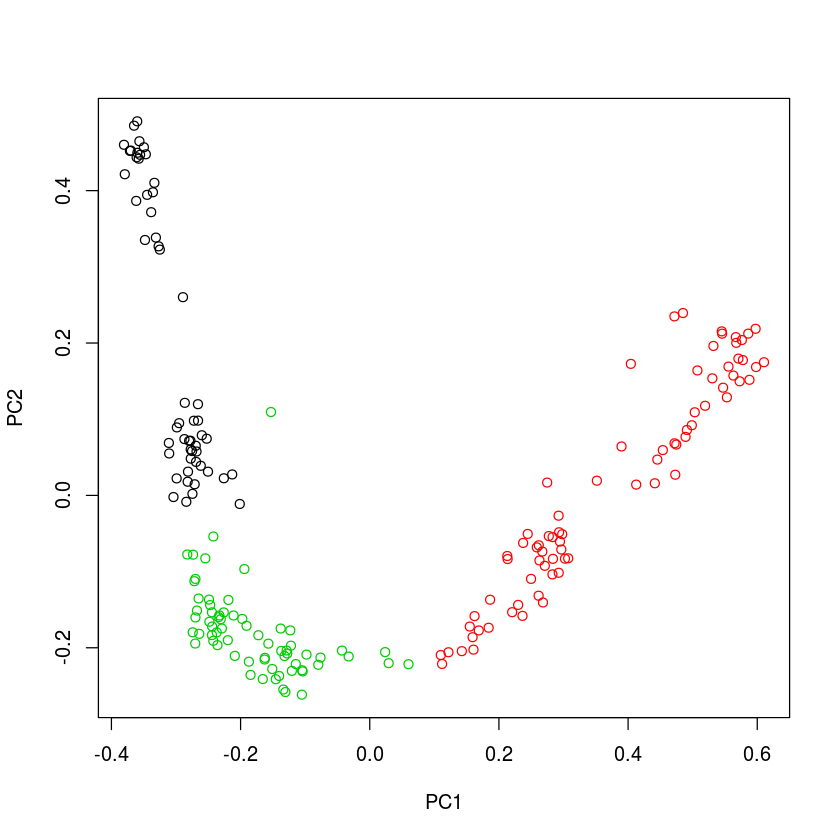

In [74]:
#--------------------------------kmeans------------------------
set.seed(123)
# clus<-kmeans(s,3)

#wordcloud
m <- as.matrix(tfidf)
rownames(m) <- 1:nrow(m)

norm_eucl<- function(m)m/apply(m,MARGIN=1, FUN=function(x)sum(x^2)^.5)#Normalization first
m_norm<-norm_eucl(m)

cl_3<-kmeans(m_norm,3)
table(cl_3$cluster)
# png("kmeansCluster.png")
plot(prcomp(m_norm)$x, col=cl_3$cl)
# dev.off()

In [75]:
cl_3$tot.withinss

[1] 130.9604

### Three clusters: *however we have topics more than 4?* Lets check with 6


 1  2  3  4  5  6 
32 19 85 19 25 16 

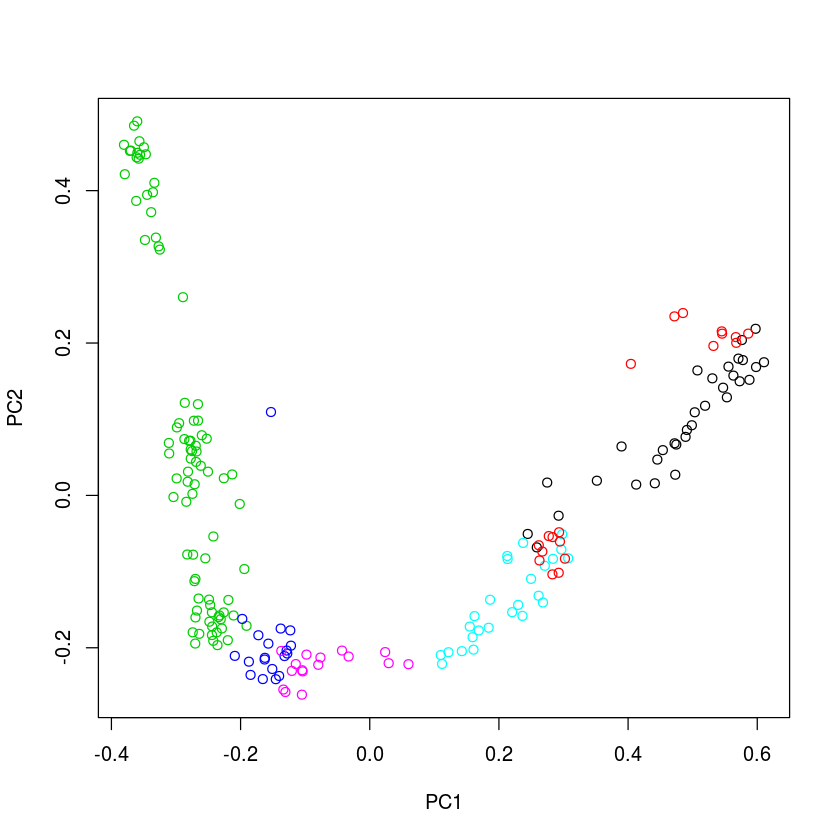

In [76]:
#cluster numbers = 6
m_norm<-norm_eucl(m)
cl_6<-kmeans(m_norm,6)
table(cl_6$cluster)
# png("kmeansCluster.png")
plot(prcomp(m_norm)$x, col=cl_6$cl)

### Which one to choose?

There are 3 SSE- based measures that we consider: total withinSSE, betweenSSE and total SSE.
The actual values of those measure are difficult to interpret. We will be looking at the ratio
withinSSE/totalSSE. Total withinSSE shows how coherent (tight) are the clusters. The betweenSSE
shows how well the clusters are separated. The total SSE is the sum. A good clustering has tight
clusters that are well separated. So, we would like ratio withinSSE/totalSSE to be small. As we
experiment with different representations, we should compare that ratio to see what representation
gives better clustering

In [77]:
SSE_3<-100-(cl_3$tot.withinss/cl_3$totss)*100
SSE_3
SSE_6<-100-(cl_6$tot.withinss/cl_6$totss)*100
SSE_6

[1] 15.51534

[1] 21.98992

## LDA:

In [ ]:
# svs = sort.list(abs(svd(dtms)$v[,4]), decreasing = TRUE)
# dtms$dimnames$Terms[head(svs, 6)]

In [ ]:

##return top words by concept

##first create function to return top words; require dtms
concept<-function(num){ 
  sv<-sort.list((svd(dtms))$v[,num],decreasing = FALSE)
  # print(sv)
  # print(dtms$dimnames)
  dm<-dtms$dimnames$Terms[head(sv,5)] 
  return(dm)
}

In [ ]:
##how many words?
num <- num_docs
i <- 1:num
val <- sapply(i, concept)

In [ ]:
val

In [ ]:
library(ggplot2)
ii <- 2000:2011
ss <- rnorm(12,0,1)
pm <- data.frame(ii,ss)
tmpplot <- ggplot(pm, aes(x = ii, y = ss))
plot <- tmpplot + geom_line() + scale_x_continuous(breaks=seq(2000,2011, 0.5))
plot 

In [ ]:
# write.table(val,file=paste("/home/harish/PycharmProjects/Topic-Modeling/val.csv"), append = T)
# ldaGibbs5@gamma

In [ ]:
# ##how many words?
# num <- 5
# i <- 1:num
# sapply(i, concept)
# # https://stackoverflow.com/questions/14875493/lda-with-topicmodels-how-can-i-see-which-topics-different-documents-belong-to


In [ ]:
# k=5
# ldaGibbs5 <-LDA(dtms, k, method = "Gibbs") 
# #docs to topics 
# ldaGibbs5.topics <- as.matrix(topics(ldaGibbs5))
# #get probability of each topic in each doc
# topicProbabilities <- as.data.frame(ldaGibbs5@gamma)

In [ ]:
# topicProbabilities
# nrow(ldaGibbs5@gamma)

In [ ]:
# vector <- NULL
# for(i in 1:nrow(ldaGibbs5@gamma)) {
#   vector <- c(vector, ldaGibbs5@gamma[i,])
# }


# Concepts <- rep(c("Concept 1","Concept 2","Concept 3", "Concept 4","Concept 5"),times=102)#why 80?
# TimeByDocs <- as.numeric(rep(1:102,each=5))
# chartdata <- data.frame(Concepts,TimeByDocs,vector)
# myplot <- ggplot(chartdata, aes(x=TimeByDocs,y=vector,fill=Concepts)) + geom_area()


In [ ]:
# ggsave(filename="myPlot.png", plot=myplot)

In [ ]:
# l<-c()
# i <- 0
# for (j in 1993:2005){
#    l[i] <- j
#     i <- i + 1
# }

In [ ]:
##how many words?
# for (k in 2:5){

    num <- num_docs
    i <- 1:num
    val <- sapply(i, concept)
    # https://stackoverflow.com/questions/14875493/lda-with-topicmodels-how-can-i-see-which-topics-different-documents-belong-to
    
k = 4

    ldaGibbs_k <-LDA(dtms, k, method = "Gibbs") 
    #docs to topics 
    ldaGibbs_k.topics <- as.matrix(topics(ldaGibbs_k))
    #get probability of each topic in each doc
    topicProbabilities <- as.data.frame(ldaGibbs_k@gamma)
write.table(val,file=paste("/home/harish/PycharmProjects/Topic-Modeling/val.csv"), append = T)

    vector <- NULL
    for(i in 1:nrow(ldaGibbs_k@gamma)) {
      vector <- c(vector, ldaGibbs_k@gamma[i,])
    }


    Concepts <- rep(c("Concept 1","Concept 2","Concept 3", "Concept 4"),times=num_docs)#why 80?
    TimeByDocs <- as.numeric(rep(1:num_docs,each=k))
    chartdata <- data.frame(Concepts,TimeByDocs,vector)
    myplot <- ggplot(chartdata, aes(x=TimeByDocs,y=vector,fill=Concepts)) + geom_area()
    plotname <- paste(k,"png", sep=".");
    ggsave(filename=plotname, plot=myplot)
    
# }

In [ ]:
ii <- 1993:2017
TimeByDocs <- as.numeric(rep(1:num_docs,each=k))
plot <- ggplot(chartdata, aes(x=TimeByDocs,y=vector,fill=Concepts)) + geom_area()
plot 
TimeByDocs <- as.numeric(rep(1993:2017,each=k))
TimeByDocs

In [ ]:
# Concepts <- rep(c("Concept 1","Concept 2","Concept 3", "Concept 4","Concept 5"),times=102)#why 80?
#     TimeByDocs <- as.numeric(rep(c("1993","1994","1995","1996","1997","1998","1999",
#                                    "2000","2001","2002","2003","2004","2005"),each=k))
#     chartdata <- data.frame(Concepts,TimeByDocs,vector)
#     myplot <- ggplot(chartdata, aes(x=TimeByDocs,y=vector,fill=Concepts)) + geom_area()
# myplot

In [ ]:

write.table(topicProbabilities,file=paste("/home/harish/PycharmProjects/Topic-Modeling/val.csv"), append = T)

In [ ]:
length(ldaGibbs_k@beta)/4


In [ ]:
ldaGibbs_k@beta

In [ ]:
# dtms$dimnames$Terms

In [ ]:
ldaGibbs_k$dimnames

In [ ]:
ldaGibbs_k@beta[4,].abs

In [ ]:
lda.terms <- as.matrix(terms(ldaGibbs_k, 5))
lda.terms

In [ ]:
length(terms(ldaGibbs_k, 2000)[,1])# First column how many terms in topic; 1858 not 2000

# LSA